# Elliptic Curves

In [1]:
from ec_rounded import EllipticCurve, ECPoint
import math
import warnings
warnings.filterwarnings('ignore')

### What are Elliptic Curves?

Elliptic curves have the form:
$$y^2 = x^3 + ax + b$$

where $a$ and $b$ are constants that define the shape of the curve. <br><br>
For the values $a = -1$ and $b = 1$ the curve looks as follows:

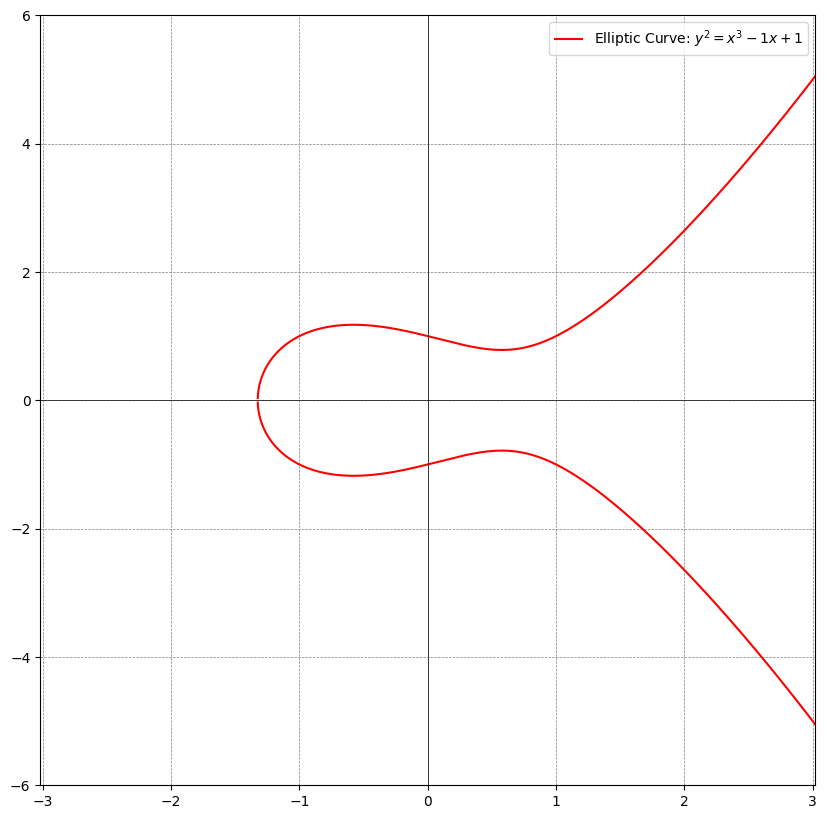

In [2]:
curve = EllipticCurve(-1, 1)
curve.plot_curve(-2, 5, lims=(3, 6))

Elliptic curves can take on many different shapes, as you can see here:

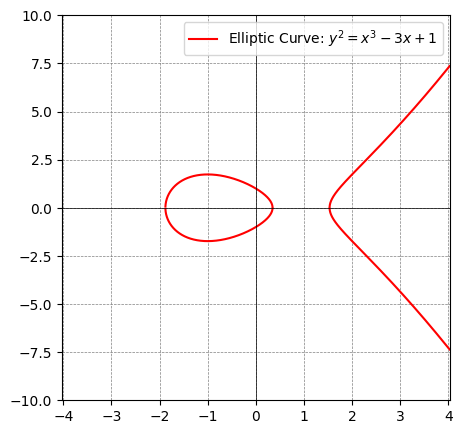

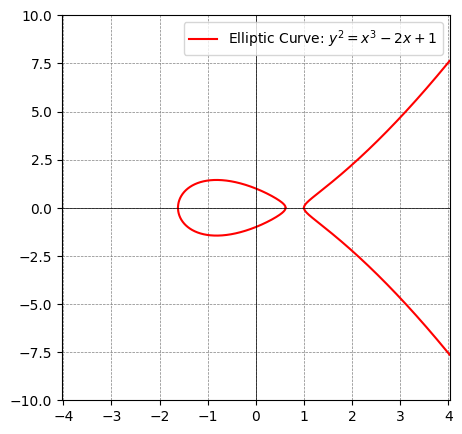

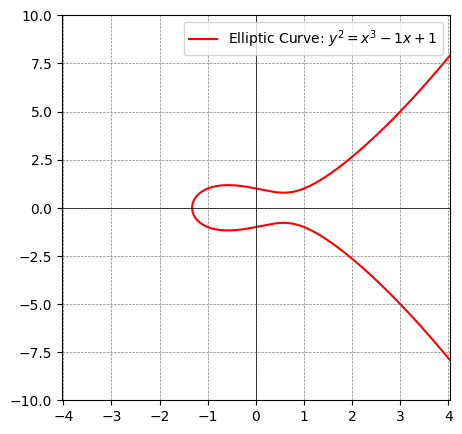

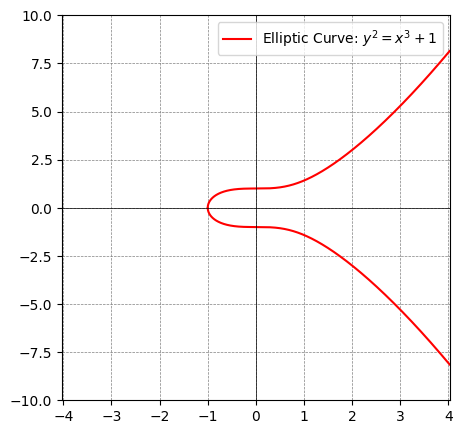

In [3]:
b = 1
for a in range(-3, 1):
    curve = EllipticCurve(a, b)
    curve.plot_curve(-2, 5, lims=(4, 10), figsize=(5, 5))

The only limitation is that $4a^3 + 27b^2 ≠ 0$ so that we exclude singular curves, i.e. curves with cusps or self-intersections. <br><br> 
Examples of these are the following:

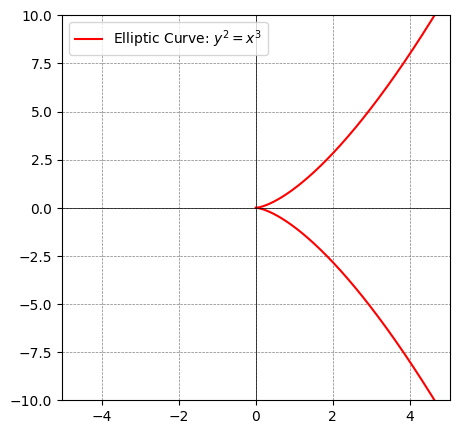

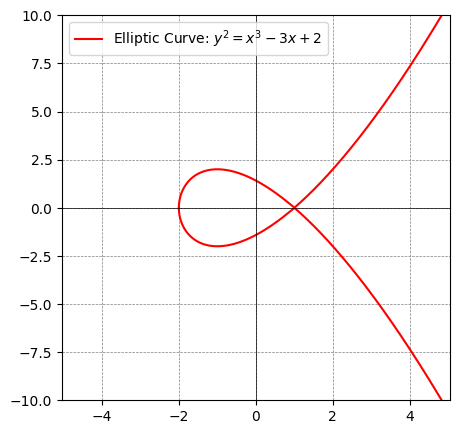

In [4]:
curve = EllipticCurve(0, 0)
curve.plot_curve(-2, 5, figsize=(5, 5))
curve = EllipticCurve(-3, 2)
curve.plot_curve(-2, 5, figsize=(5, 5))

Singular curves are not safe to use for cryptography because the key characteristic of non-singular elliptic curves that we rely on for elliptic curve cryptography, namely point addition, breaks down for singular curves.

### Points on an Elliptic Curve

A point on an elliptic curve is an (x, y) pair that satisfies $y² = x³ + ax + b$ for a given $a$ and $b$.

For the elliptc curve with $a=-1$ and $b=1$, the point $(3, 5)$ lies on the curve since $5^2 = 3^3 - 3 + 1$:

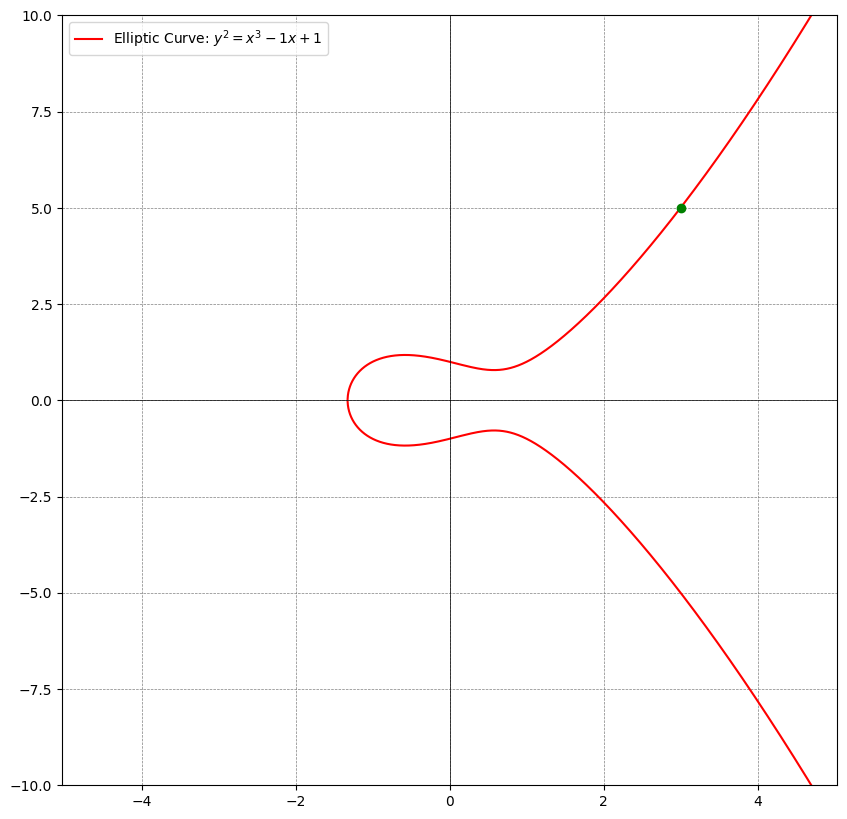

In [5]:
curve = EllipticCurve(-1, 1)
point = ECPoint(3, 5, curve)
curve.plot_curve(-2, 5, point=point)

Rather than thinking of elliptic curves as a continuous plot on a graph we can think of them as an infinite set of points that satisfy the elliptic curve equation. This allows us to look at them as a group and therefore we can apply the rules of a group to them. This is especially important for what's called "point addition". Before we get to point addition, let's revise what groups are and what rules they follow.

## Groups

A group is a set equipped with a single binary operation that satisfies the following key properties:<br><br>
1. **Binary Operation**: A binary operation on a set $G$ is a rule that combines two elements of $G$ to produce another element of $G$. <br><br><br>
2. **Closure**: If $a$ and $b$ are in the group $G$, then the result of the operation $a ∗ b$ must also be in $G$. Not that "$*$" denotes the binary operation and not multiplication here.<br><br><br>
3. **Associativity**: The operation must be associative, meaning $(a ∗ b) ∗ c = a ∗ (b * c)$ for all $a,b,c ∈ G$.<br><br><br>
4. **Identity**: There must be an element $e$ in $G$ such that $a ∗ e = e ∗ a = a$ for all $a ∈ G$. This $e$ is called the identity element.<br><br><br>
5. **Inverse Element**: For each element $a$ in $G$, there must be an element $b$ in $G$ such that $a ∗ b = b ∗ a = e$, where $e$ is the identity element. The element $b$ is called inverse of $a$.

One of the amazing benefits of abstract algebra is that we can define a binary operator in any way, as long as it consistently satisfies the properties required for the structure being studied (e.g., a group, ring, field). This means that in our case we just need a definition of the binary operation that makes our elliptic curve points behave like group elements and satisy all the above properties of a group. This is similar to how we defined addition and multiplication differently to normal math (by using moudlar arithmetic) for finite fields.<br><br>
The binary operation that we will use (which is also the most natural and widely accepted one) is **point addition**.

## Point Addition

Point addition is when we combine two points on the curve and get a third point, also on the curve. <br><br>
To define point addition we rely on a key observation about elliptic curves: <br><br>
- **A line will intersect it at either three points or one point**, except in a handful of special cases. <br><br>
- As long as we do not pick a perfectly vertical line, **if we intersect two points in an elliptic curve, then we will also intersect a third point on the elliptic curve**.

Under point addition, elliptic curves actually form an abelian group, which just means that the binary operation (point addition) is also commutative, i.e. that $a ∗ c = c ∗ a$ for all $a,c ∈ G$. 

### Three intersections

Using the set of points that satisfy the elliptic curve equation $y^2 = x^3 + 8$ as an example we can see that a straight line such as $y = 0.8x + 2.4$ intersects the eliptic curve at three points:

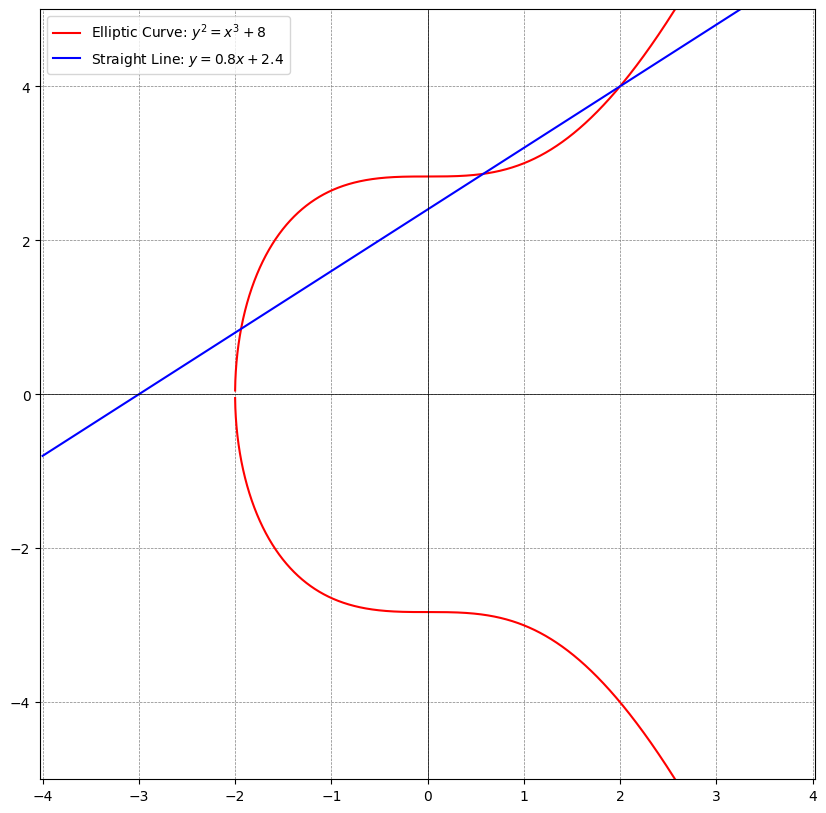

In [6]:
curve = EllipticCurve(0, 8)
curve.plot_curve(-4, 4, lims=(4, 5), line=(0.8, 2.4))

This is the case because the straight line was deliberately constrcuted in a way that it would intersect the elliptic curve three times within the range of the coordinate system displayed in the plot. But what about a straight line that is more vertical? Would it ever intersect the elliptic curve a third time if it intersects it at two points?

#### Does this line ever intersect a third time?

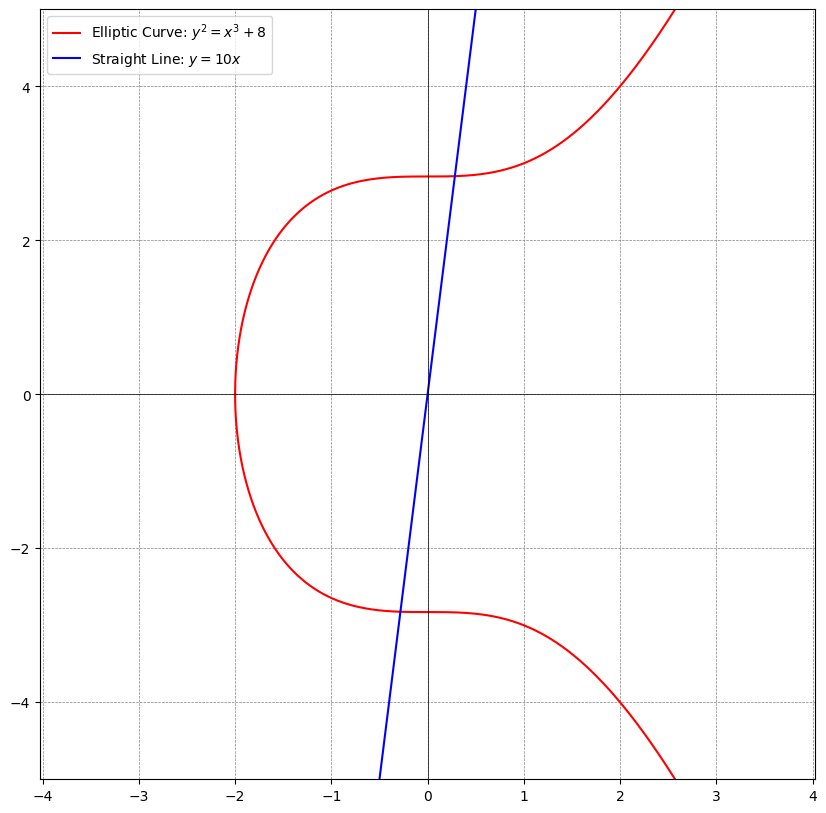

In [7]:
curve.plot_curve(-2, 5, lims=(4, 5), line=(10, 0))

Just looking at the range of the coordinate system displayed above it looks like the blue line is steeper than the red curve and as if the two lines would not intersect a third time. It turns out that when you zoom out far enough the two lines always eventually intersect again (as long as the blue ine is not perfectly vertical). The same straight line and elliptic curve eventally intersect a third time somwehere around the point (100, 1000):

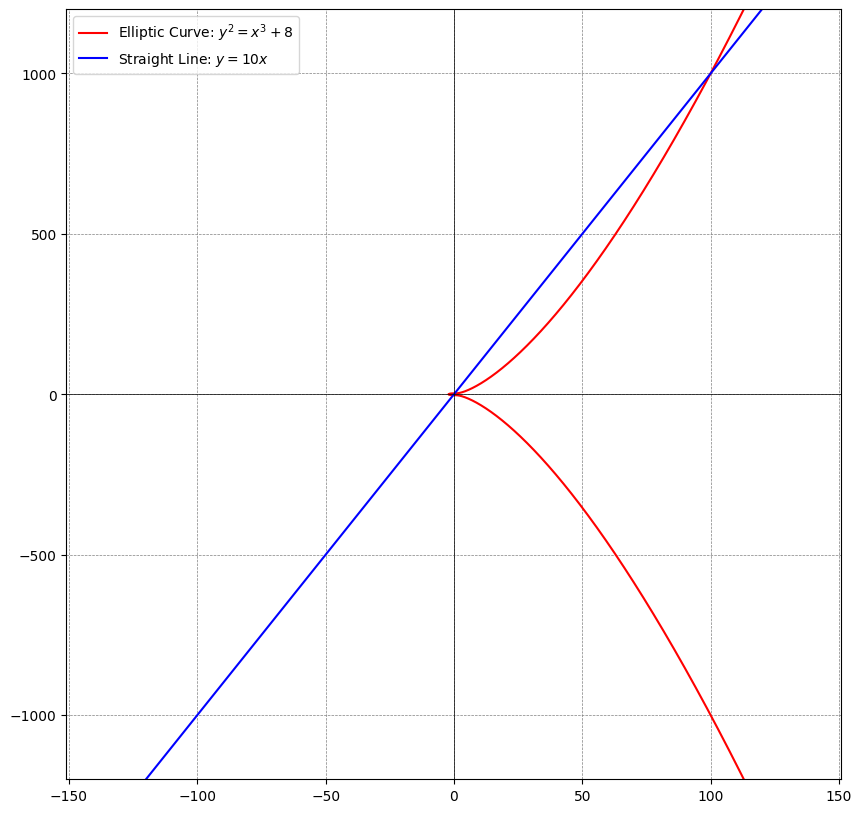

In [8]:
curve.plot_curve(-150, 200, lims=(150, 1200), line=(10, 0))

Mathematically this is explained by taking the square root of both sides of the elliptic curve function and comparing it to the equation for the straight line:<br><br>
$$y = \sqrt{x^3 + 8}$$
$$y = 10x$$
As the value of $x$ gets really large, the term $x^3$ dominates the behavior of the polynomial $x^3 + ax + b$, so that for the square root of any elliptic curve equation we get:<br><br>
$$y = \sqrt{x^3 + ax + b} ≈ \sqrt{x^3} ≈ x^{1.5}$$
as x gets very large. This will eventually rise faster than any linear function $y = Cx$, regardless of how large $C$ is, causing them to intersect again.<br><br>

Also note that the line doesn't have to intersect the elliptic curve at the "U-shape" part of the curve for this to be true, as you can see here:

#### Line not intersecting at the "U-shape"

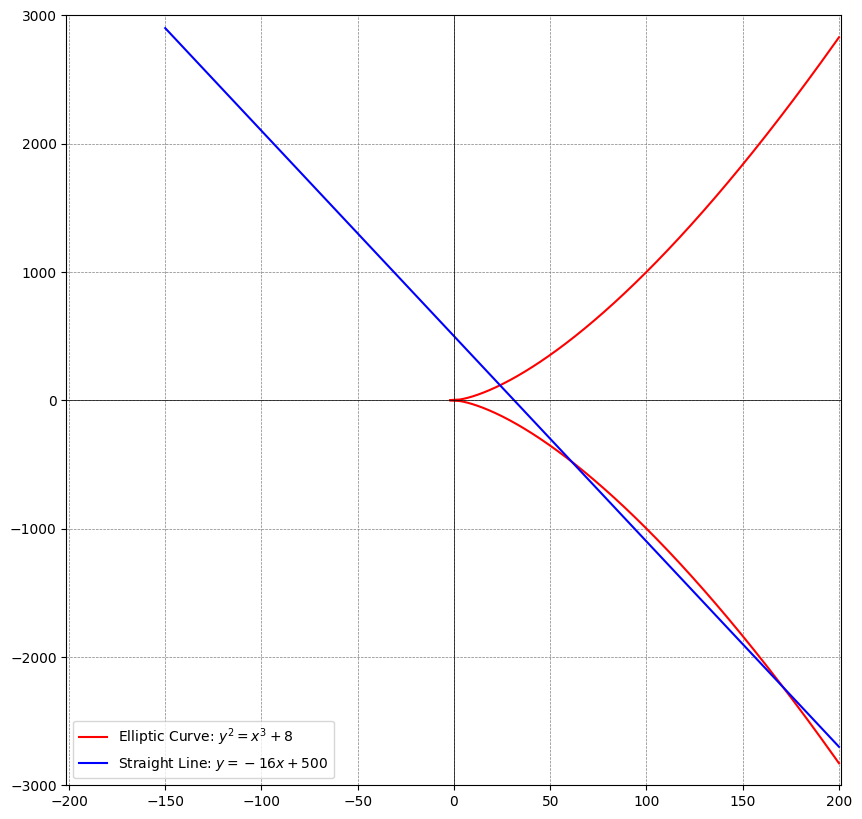

In [9]:
curve.plot_curve(-150, 200, lims=(200, 3000), line=(-16, 500))

### One intersection

If we move the y-axis intercept up a little bit and reduce the steepness of our curve from above, we can create a scenario where the straight line intersects the elliptic curve only once:

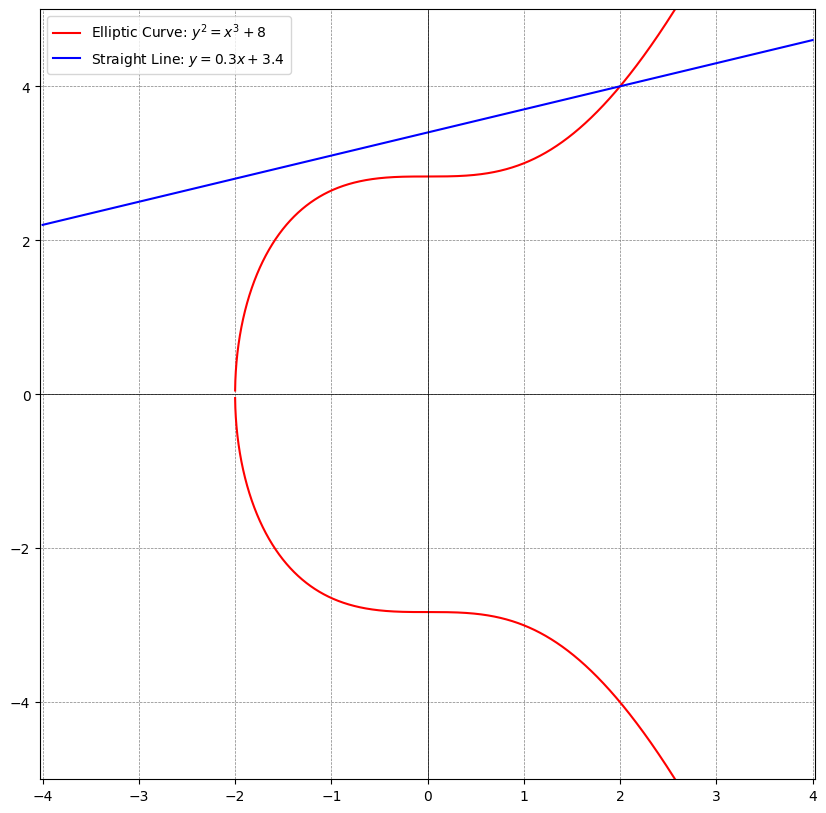

In [10]:
curve.plot_curve(-4, 4, lims=(4, 5), line=(0.3, 3.4))

Even if we zoom out further we can see that the blue and red line never intersect again:

#### This line never intersects again

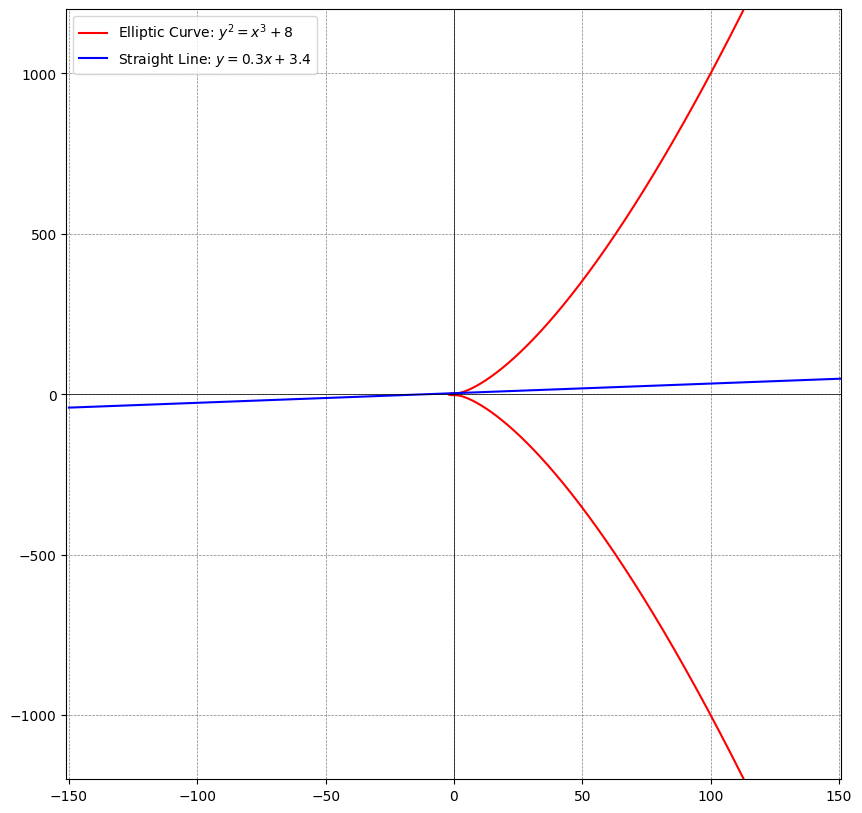

In [11]:
curve.plot_curve(-150, 200, lims=(150, 1200), line=(0.3, 3.4))

#### Horizontal line

Another obvious example for a straight line that only intersects an elliptic curve once is a perfectly horizontal line.

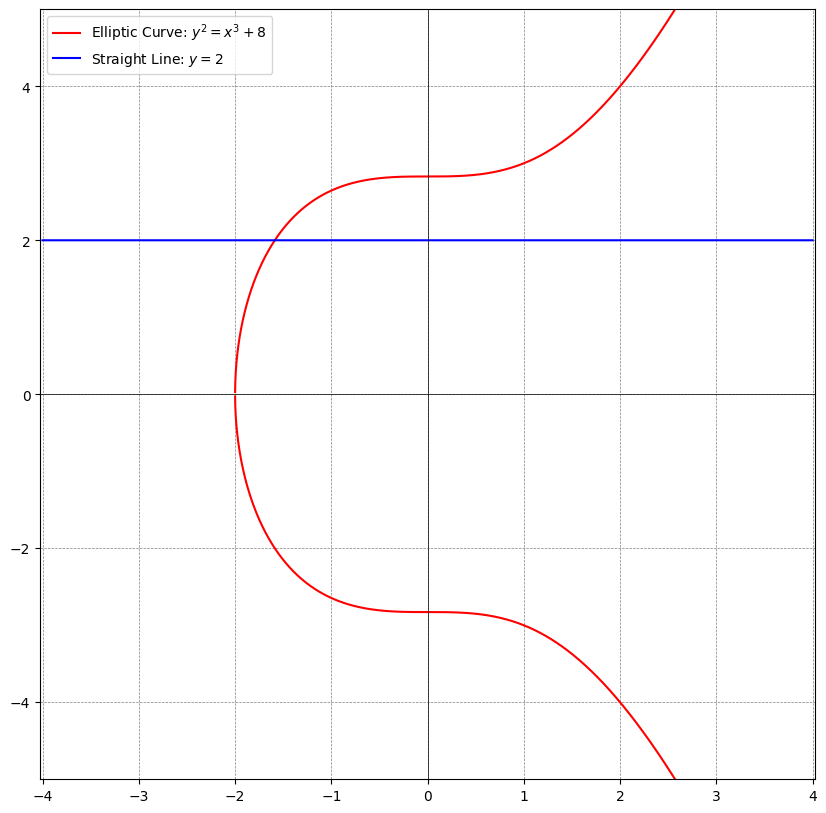

In [12]:
curve.plot_curve(-4, 4, linspace=30000, lims=(4, 5), line=(0, 2))

The cases where we have a straight line that intersects the elliptic curve at only one point are valid for understanding elliptic curves but for the binary operation we want to define, point addition, they are irrelevant because, by definition, for point addition we need at least two points. There is a special case where we add a point to itself but in that case we won't have a line that intersects at only one point... more on this later.

### Special Cases

#### Vertical lines

There are two special cases for vertical lines. The first is a vertical line that intersects at two points:

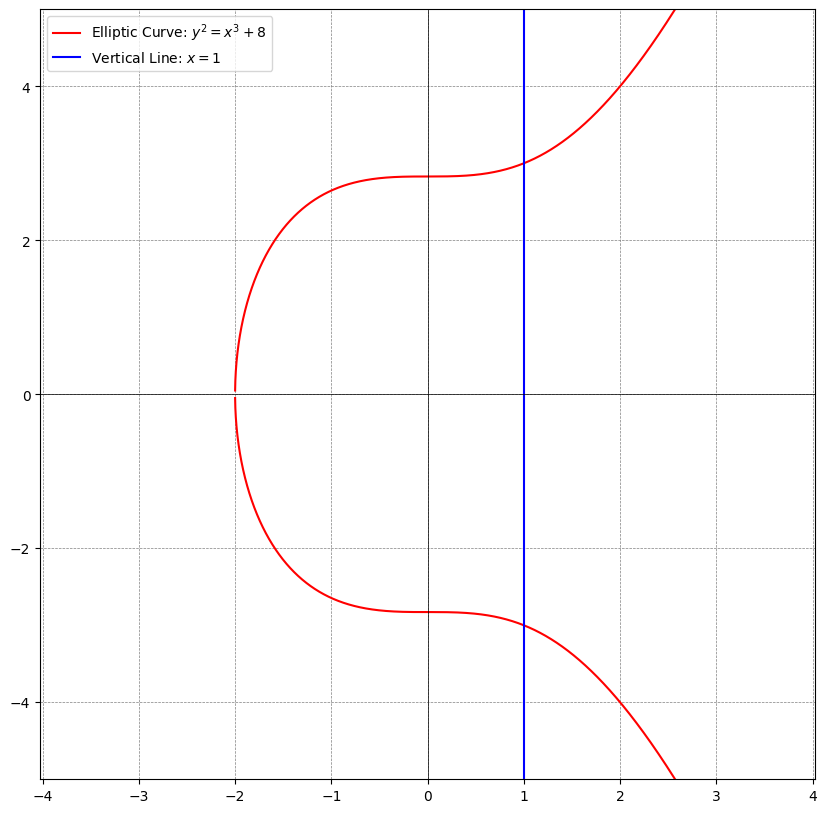

In [13]:
curve.plot_curve(-4, 4, lims=(4, 5), vline_x=1)

The second is a vertical line that is tangent to the curve. In this case the vertical line will be tangent to the elliptic curve at $y = 0$:

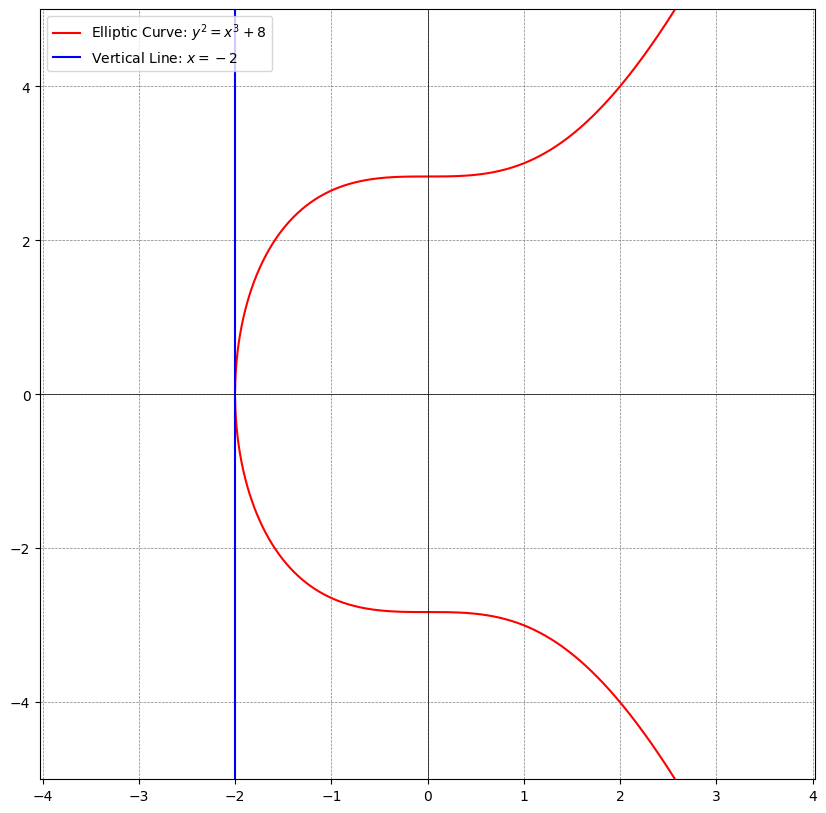

In [14]:
curve.plot_curve(-4, 4, lims=(4, 5), vline_x=-2)

#### Non-vertical tangent lines

If a straight line is tangent to the curve at any point and it is not perfectly vertical we will once again have a case where the line intersects the elliptic curve at one other point. This is due to the same logic we used to show that a non-vertical line that intersects two points on a curve must intersect at a third point. An example is the following line:

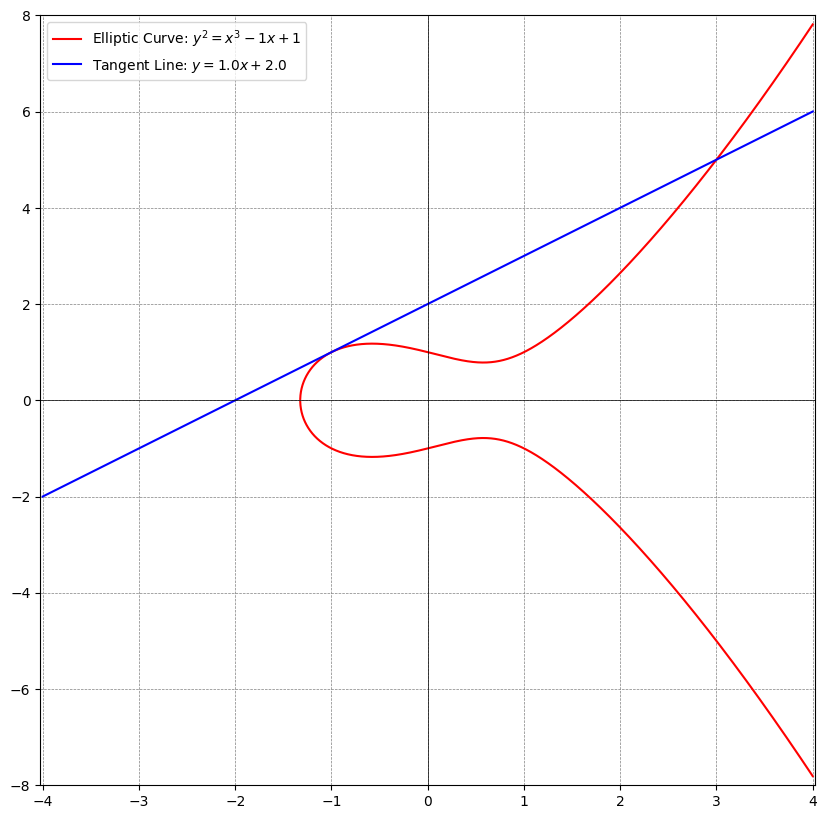

In [15]:
curve = EllipticCurve(-1, 1)
point = ECPoint(-1, 1, curve)
curve.plot_curve(-4, 4, lims=(4, 8), tangent_point=point)

The fact that any non-vertical tangent line intersects the elliptic curve at one other point will be the key building block for what's called "Scalar Multiplication", which is just adding a point to itself a given number of times. More on this later.

## How Point Addition Works

There are essentially three scenarios that we need to cover for a complete and robust implementation of point addition:<br><br>
1. The two points being added are different and not on a vertical line.<br>
2. The two points are in a vertical line or one of them is the identity element.<br>
3. The two points are the same (adding a point to itself).

Before we look at each of these it's important to define what the inverse of an elliptic curve point is.

### Inverse of an elliptic curve point

 The inverse of an elliptic curve point is the negative of the y value of the pair. That is, the inverse of $(x, y)$ is $(x, -y)$ and vice versa. Drawing a line through such points creates a perfectly vertical line. 

This fact is important to know for multiple of the scenarios below.

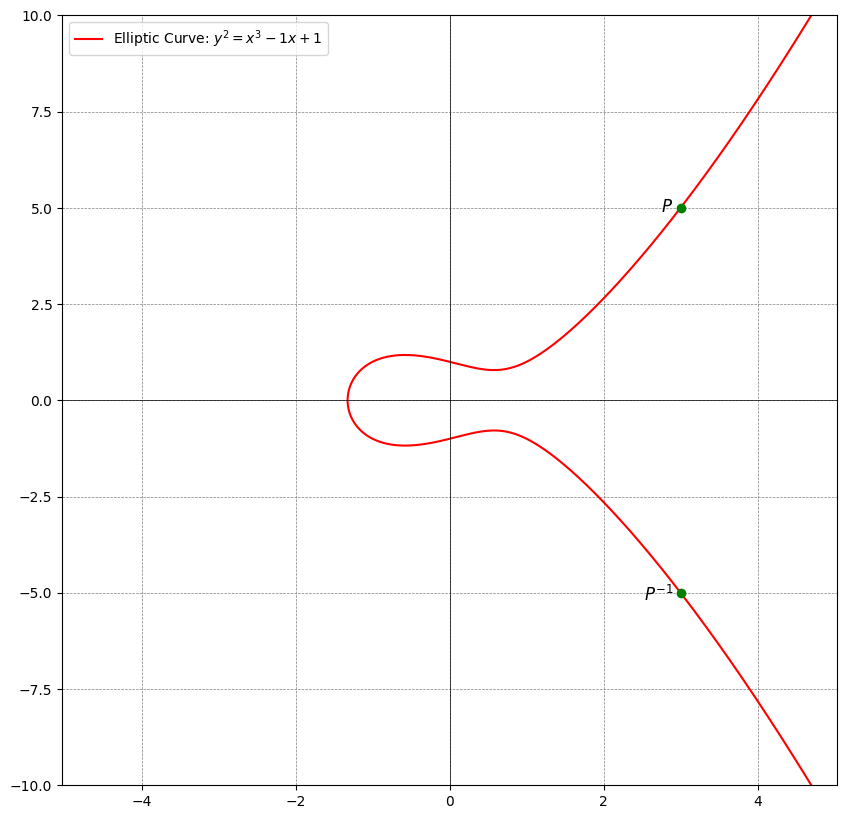

In [16]:
curve = EllipticCurve(-1, 1)
point = ECPoint(3, 5, curve)
curve.plot_curve(-2, 5, point=point, inverse=True)

### Different points not on a vertical line

The general logic for point addition of elliptic curve elements is the following:<br><br>
- Draw a line through the two points being added together and find the point where it intersetcs a third time.<br>
- Reflect the resulting point over the x-axis<br>


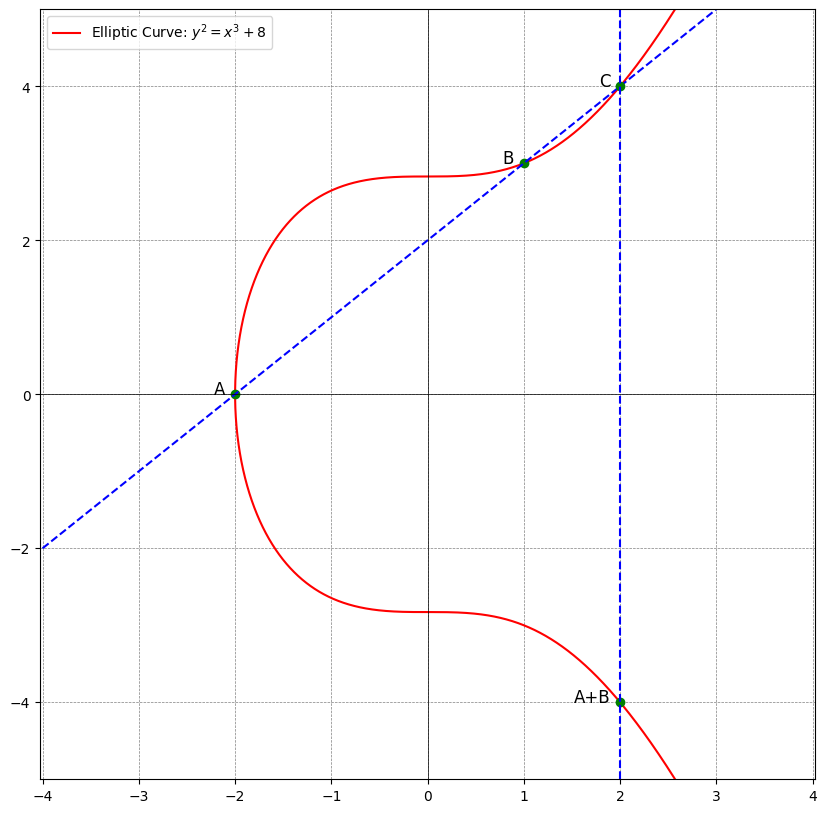

In [17]:
curve = EllipticCurve(0, 8)
p1 = ECPoint(-2, 0, curve)
p2 = ECPoint(1, 3, curve)
curve.plot_point_addition(-4, 4, p1, p2, lims=(4, 5))

The above chart also shows that point addition is commutative, in the sense that $A + B = B + A$. The visualisation shows this because the line that intersects $A$ and $B$ intersects at only one other point and that point is always the same no matter the order.<br><br>
The fact that we reflect the resulting point over the x-axis to get the  result of point addition may seem odd but it's required so that the definition of point addition is in line with the properties of a group and that there are no mathematical inconsistencies. 

### Why we need to reflect over the x-axis

#### Mathematically

Mathematically, if we didn't do the reflection, we would have the following set of equations that are all true:
$$A + B = C$$
$$B + C = A$$
$$A + C = B$$
If we substitue the $B + C$ into the last equation in place of $A$, we get:
$$B + C + C = B$$
$$B + C = B + C^{-1}$$
$$C = C^{-1}$$
As we said above, the inverse of an elliptic curve point $(x,y)$ is $(x, -y)$, so we have a contradiction. There is only one point that is equal to it's inverse and that is the identity element, as will be discussed below.<br><br>

#### Intuitively

There is also a more intuitive way of understanding the importance of the reflection over the x-axis and it's related to the condition of "Associativity" for group elements. Associativity means that $(A + B) + C = A + (B + C)$. The below charts show visually that point addition is in fact associative:

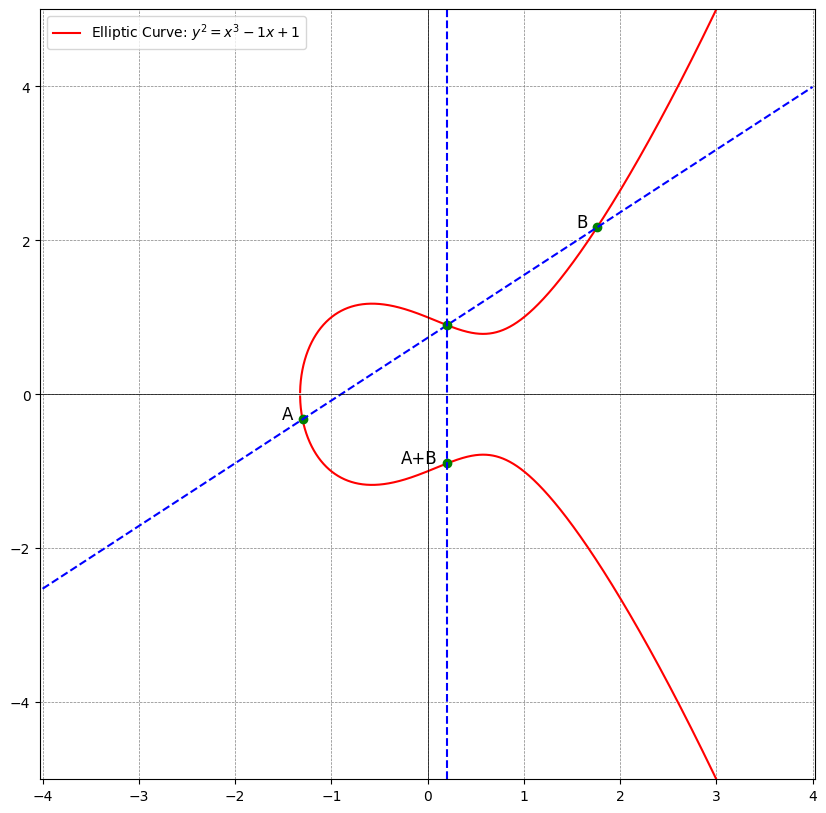

In [18]:
curve = EllipticCurve(-1, 1)
A = ECPoint(-1.299299299299299, -0.32534587344569654, curve)
B = ECPoint(1.7607071144748716, 2.167404576752626, curve)
A_B = A + B
curve.plot_point_addition(-4, 4, A, B, lims=(4, 5), point_names=['A', 'B', '', 'A+B'])

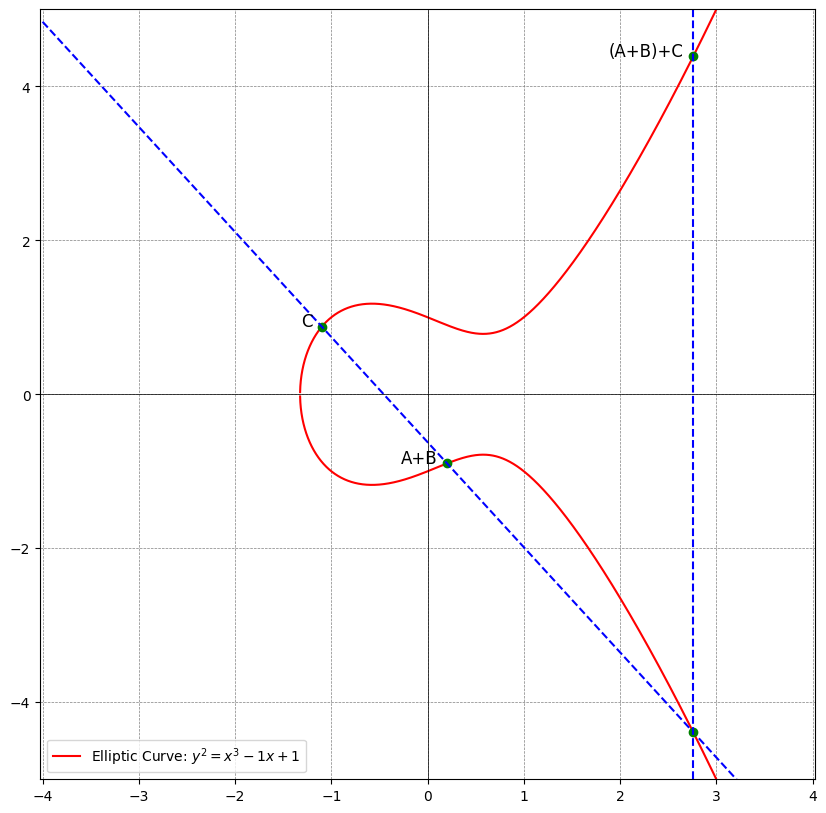

In [19]:
C = ECPoint(-1.099099099099099, 0.8782748383886056, curve)
curve.plot_point_addition(-4, 4, A_B, C, lims=(4, 5), point_names=['A+B', 'C', '', '(A+B)+C'])

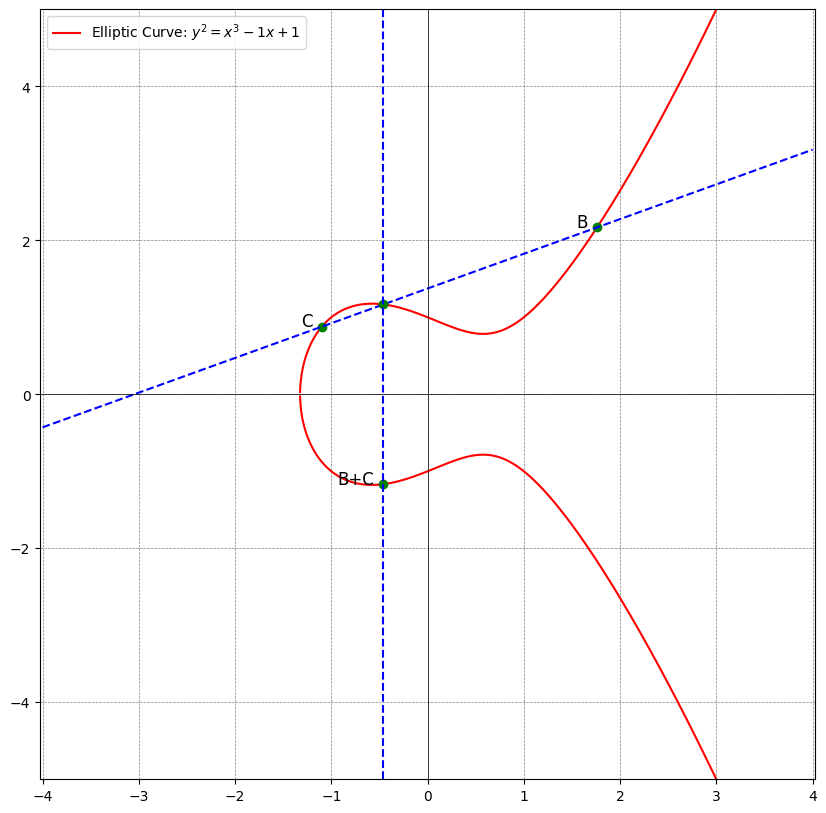

In [20]:
B_C = B + C
curve.plot_point_addition(-4, 4, B, C, lims=(4, 5), point_names=['B', 'C', '', 'B+C'])

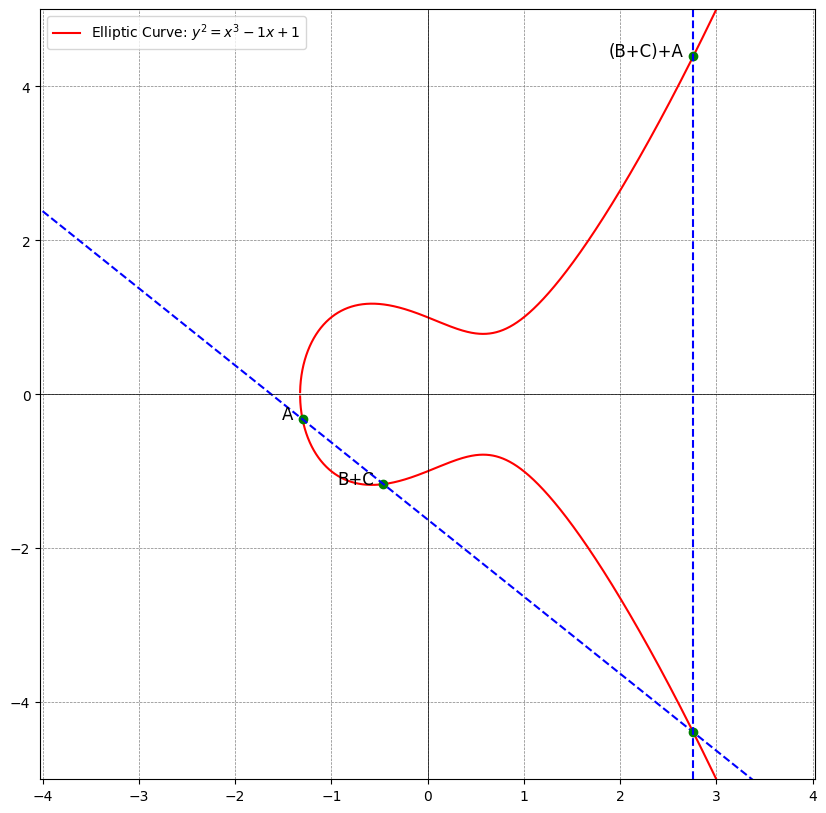

In [21]:
curve.plot_point_addition(-4, 4, A, B_C, lims=(4, 5), point_names=['A', 'B+C', '', '(B+C)+A'])

In [22]:
# Confirm that the result is actually the same
A_B + C == B_C + A

True

Given two points $A$ and $B$ we can compute the point $A+B$ using the slope formula from pre-algebra and then use the slope to calculate the $x$- and $y$-coordinate of $A+B$ as follows:
$$A = (x_1, y_1), B = (x_2, y_2), A+B = (x_3, y_3)$$
$$s = (y_2 - y_1) / (x_2 - x_1)$$
$$x_3 = s^2 - x_1 - x_2$$
$$y_3 = s(x_1 - x_3) - y_1$$
The derivation is beyond the purpose of this notebook but for anyone interested, here is a concise derivation: https://crypto.stanford.edu/pbc/notes/elliptic/explicit.html

### Points on a vertical line or identity element

Up until now we have introduced the concept of the identity element but we haven't actually defined it. In the properties of a group, there were two properties which relate to the identity element. To recap:<br><br>
4. **Identity**: There must be an element $e$ in $G$ such that $a + e = e + a = a$ for all $a ∈ G$. This $e$ is called the identity element.<br><br>
5. **Inverse Element**: For each element $a$ in $G$, there must be an element $b$ in $G$ such that $a + b = b + a = e$, where $e$ is the identity element. The element $b$ is called inverse of $a$.<br><br>
In elliptic curve point addition, the identity element is officially called the "point at infinity".

This term is a bit confusing and it might be easier to think of this as the "point that is nowhere". This point isn't technically on the curve and therefore wouldn't belong to the group but remember that in abstract algebra we can define binary operations however we like over groups arbitrarily defined, as long as the definition is consistent with the rules of a group. The group is then defined to be all the points that satisfy the elliptic curve equation and the point at infinity.<br><br>
Thinking of the identity element as the "point that is nowhere" makes property 4 easy to understand because if you combine a point on the curve with nowhere then nothing changes.<br><br>

#### Inverse Element

Regarding property 5, we already saw that the inverse of an elliptic curve point is the negative of the y value of the pair, as shown below:

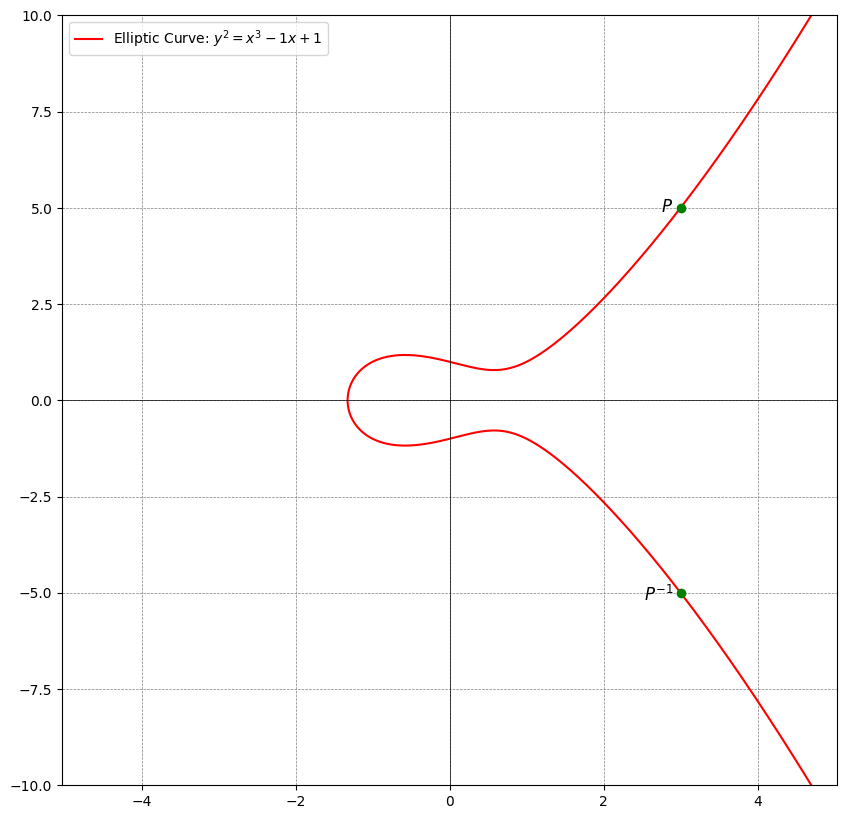

In [23]:
curve = EllipticCurve(-1, 1)
point = ECPoint(3, 5, curve)
curve.plot_curve(-2, 5, point=point, inverse=True)

#### Adding a point to its inverse

Property 5 states that if you add the inverse of a point to the point you get the identity element. For the above points, $P$ and $P^{-1}$ this means that drawing a line between the two points, which is by definition vertical, will "intersect" again at the point at infinity, i.e. the point that is nowhere, and looks like this: 

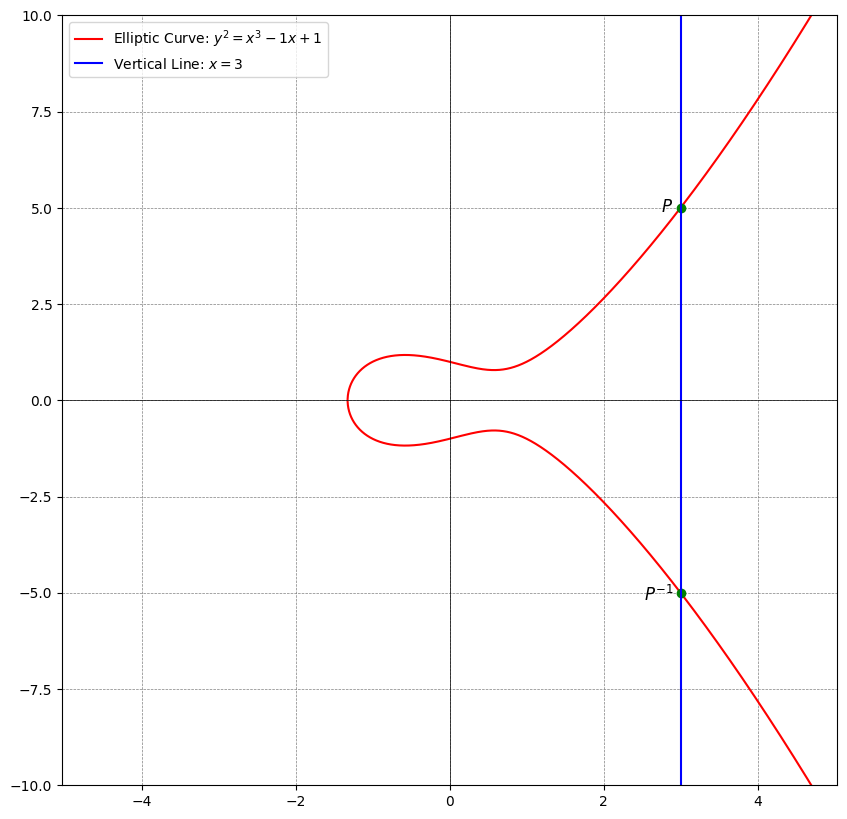

In [24]:
curve.plot_curve(-2, 5, point=point, inverse=True, vline_x=point.x)

To summarise: The point at infinity doesn’t correspond to any actual point on the curve (you won’t find coordinates for it that satisfy the curve's equation), but it’s essential for the arithmetic of elliptic curves. Why? Because it allows us to add points on the curve in a way that follows the rules of a mathematical group, ensuring that there’s always an identity element (the point at infinity) and that every point has an inverse.

### Adding a point to itself

Adding a point to itself can be thought of as bringing two points infintesimally close to each other until they become the same point. At that point, the slope of the line will lie tangent to the curve. Therefore, adding a point to itself can be done by simply taking the derivative at that point, getting the point where the tangent line intersects the elliptic curve again, and once again reflecting over the x-axis like so:

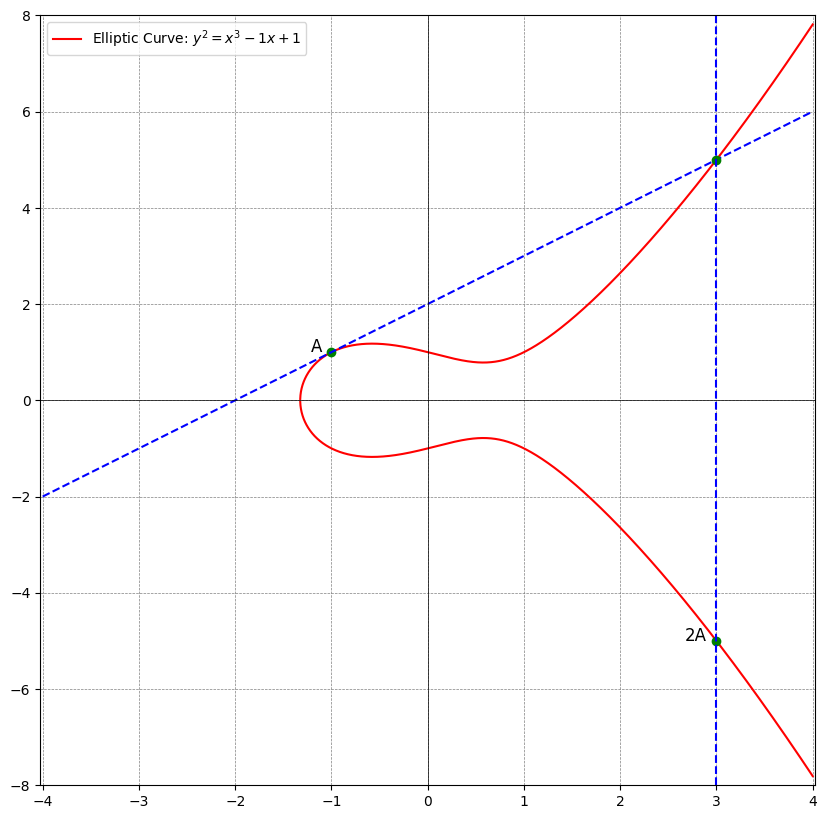

In [25]:
point = ECPoint(-1, 1, curve)
curve.plot_point_addition(-4, 4, point, point, lims=(4, 8))

The Python class for an elliptic curve point handles point addition as well:

In [26]:
point + point

ECPoint(3.0, -5.0)_on_EllipticCurve(a=-1, b=1)

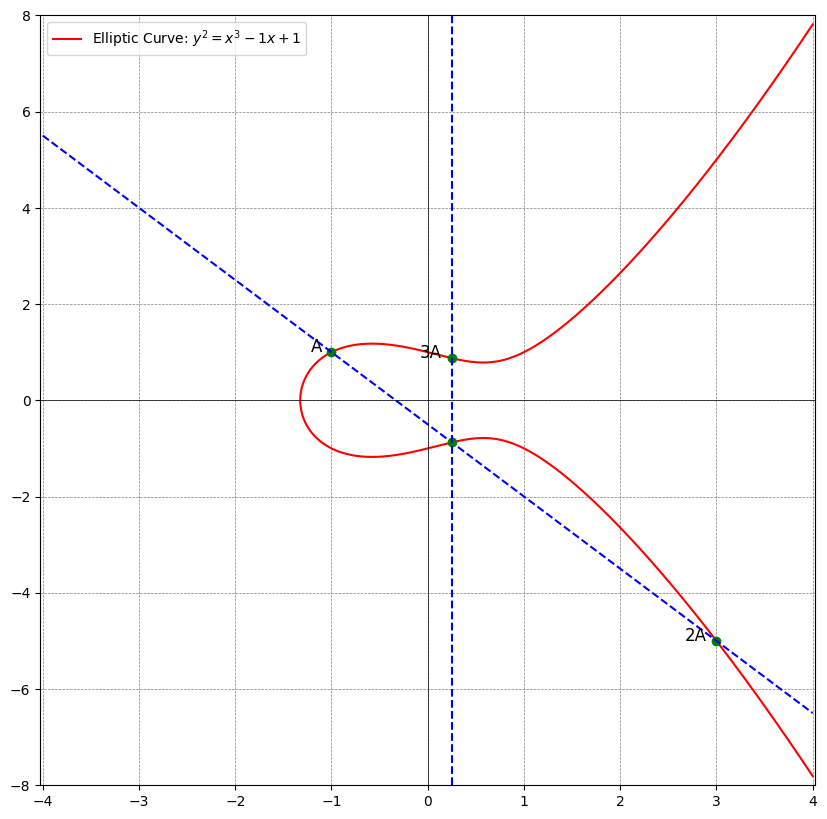

In [27]:
curve.plot_point_addition(-4, 4, point, point + point, lims=(4, 8), point_names=['A', '2A', '', '3A'])

We can also add a point to itself any number of times:

In [28]:
point + point + point + point + point + point + point + point

ECPoint(-1.3222773117164692, -0.10190583375353057)_on_EllipticCurve(a=-1, b=1)

## Point Multiplication

Adding a point on an elliptic curve to itself a given number of times is referred to as point multiplication or scalar multiplication.

The term "multiplication" is a bit misleading here because the operation is still just point addition done a given number of times.<br><br>
But what if we want to do this a large number of times? If we want to do $1000 ⋅ P$ for a point $P$ on an elliptic curve, i.e. add the point to itself $1000$ times, do we have to do $1000$ addition operations?<br><br>
The answer to that is no. In fact, the number of additions is much smaller. Let's start with a smaller example.

Above, we added the point, $P$, with coordinates $(-1, 1)$ on the elliptic curve $y^2 = x^3 - x + 1$ to itself 8 times. Another way to get the same result is to add $P$ to itself to get $2P$, then add $2P$ to itself to get $4P$ and then to add $4P$ to itself to get $8P$:

In [29]:
P = ECPoint(-1, 1, curve)
P_2 = P + P
P_4 = P_2 + P_2
P_8 = P_4 + P_4
P_8

ECPoint(-1.322277311716466, -0.10190583375354345)_on_EllipticCurve(a=-1, b=1)

This is the same result as above but we only had to do three additions instead of $8$ (technically $7$). 

For $1000 ⋅ P$ we could break it down into:
$$1000P = 512P + 256P + 128P + 64P + 32P + 8P$$

$512P$ can be computed quickly because we just need to add P to itself $9$ times. If we save all the intermediate results we also have all the other terms already and then it's just about doing the $5$ additions shown above for a total of $14 (9 + 5)$.

In CS terms, this goes from being an $O(n)$ operation to $O(log_2(n))$.

## Summary

We have now shown:
- What elliptic curves are and how they behave.
- How point addition works (line through points, intersect, reflect).
- Elliptic curve point addition is commutative and associative.
- There is an identity element, the point at infinity (the point that is nowhere).
- Every point on an elliptic curve has an inverse.
- We can add points to themselves however often we like and even do it in $O(log_2(n))$ operations.

## What's the point of point addition and elliptic curves?

One of the key properties of point addition on elliptic curves is that point addition is not easily predictable. Given all the information, we can calculate point addition easily enough with a formula, but intuitively, the result of point addition can be almost anywhere given two points on the curve. This gets especially true if we do point multiplication a large number of times and the result of this repeated point addition becomes hard to invert. This means that even if someone knows the point that is being added to itself a large number of times and the final point where the point multiplication ends up, it is extremely difficult to figure out how many times the point was added to itself. The only way to figure this out is to brute force it and go over every possible "multiplier" until you find the correct solution. For extremely large multipliers this becomes highly infeasible.